In [1]:
import os
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Specify the directory containing the masks
mask_dir = '/home/wsl/py_notebooks/zgrade/1-Building-from-satellite-imagery/test/masks'
output_dir = "/home/wsl/py_notebooks/zgrade/1-Building-from-satellite-imagery/test/masks_jpg"

# List all the files in the directory
files = os.listdir(mask_dir)

# Filter out only the .tif files
tif_files = [file for file in files if file.endswith('.tif')]

# Get the full file path for each .tif file
tif_file_paths = [os.path.join(mask_dir, file) for file in tif_files]

# Print the .tif file paths
#tif_file_paths


In [3]:
#funkcija za dobiti broj u direktoriju, npr iz ovoga => /home/wsl/py_notebooks/zgrade/1-Building-from-satellite-imagery/test/masks/22.tif dobiti broj 22
def get_num(tif_file_path):
    base_name = os.path.basename(tif_file_path)

    # Remove the extension
    base_name_no_ext = os.path.splitext(base_name)[0]
    
    # Convert the remaining string to an integer
    number = int(base_name_no_ext)
    
    return number

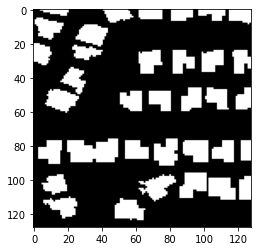

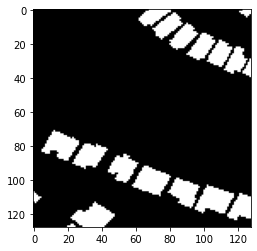

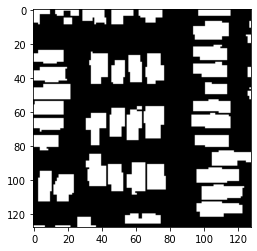

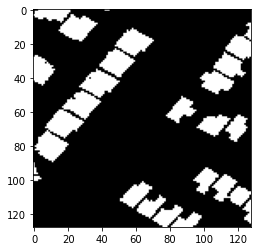

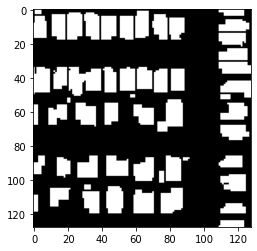

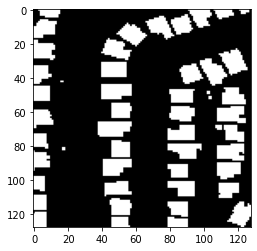

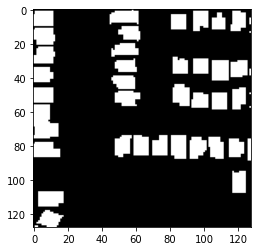

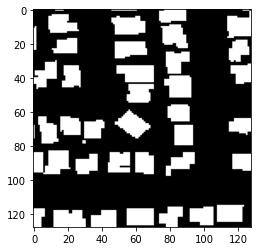

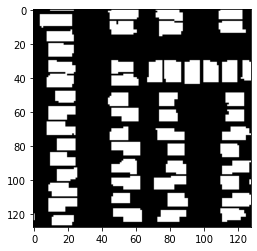

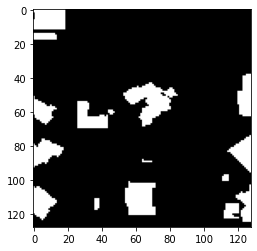

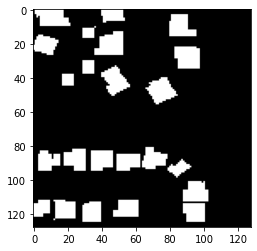

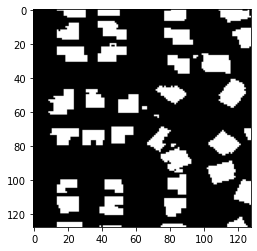

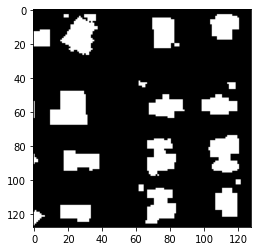

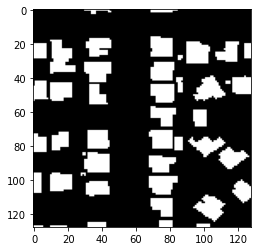

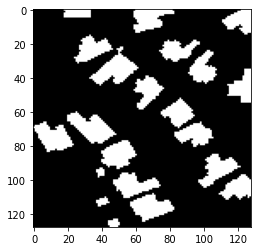

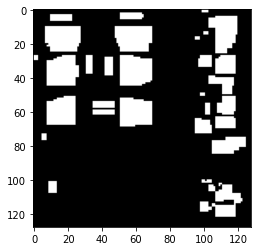

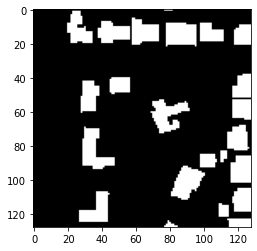

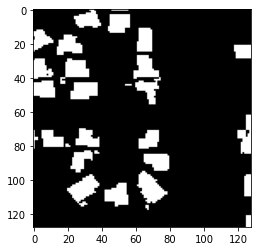

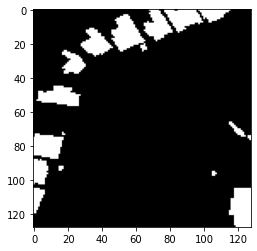

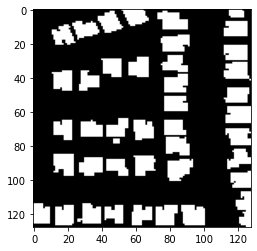

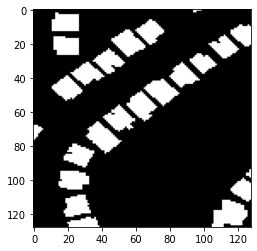

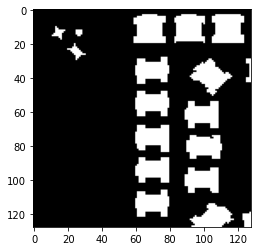

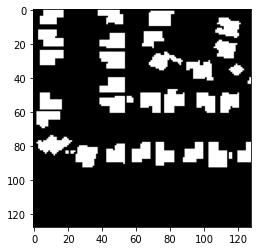

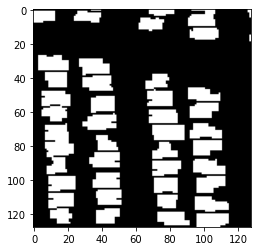

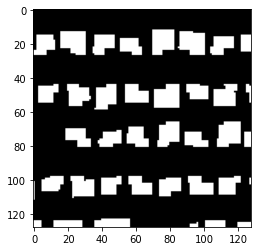

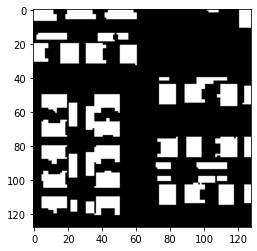

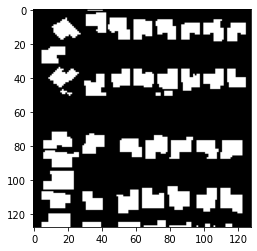

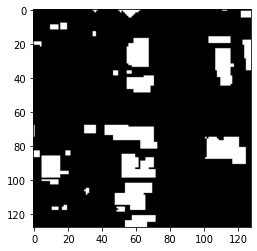

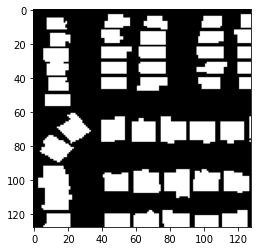

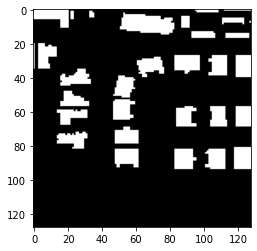

In [4]:
for file_path in tif_file_paths:
   # Read the .tif file and convert it to a NumPy array
   img_array = tifffile.imread(file_path)
   
   # Scale up the pixel values to the range 0-255
   img_array = (img_array * 255).astype(np.uint8)
   
   # Reshape the array to have three color channels
   img_rgb = np.stack((img_array,)*3, axis=-1)
   
   # Display the image using Matplotlib
   plt.imshow(img_rgb)
   plt.show()
   
   # Convert the NumPy array to a PIL image
   img = Image.fromarray(img_rgb.astype('uint8'))

   # Extract the number from the file path
   file_name = get_num(file_path)
   
   # Specify the path to save the .jpg file
   jpg_file_path = output_dir + f'/{file_name}.jpg'
   
   # Save the image as a .jpg file
   img.save(jpg_file_path, "JPEG", quality=100)